# Investigate a Dataset - TMDB Movies Dataset

## Introduction

### Dataset 

The TMDB Dataset was chosen by me for my data analysis project - Investigate a dataset. This dataset has over 10,000 entries which dates as far back as from 1966 - 2015.

##### Value count: 
* Row count - 10,866
* Column count - 21
* At this point, it is possible to say that this dataset may contain duplicate values as well as null values.

##### Field Description:
* id - a unique identifier for each entry in the dataset. No two id can be the same.
* original_title - the name given to the movie
* revenue - the money generated from the movie
* popularity - the state of being liked by viewers
* runtime - the length of time a movie lasts.
* cast - the actors/actresses that starred in the movie
* release_date - the date the movie was released
* genres - the attributes of the movie such as Comedy, Drama, e.t.c.
* and 13 other fields

### Questions for Analysis

1. What movies get the highest or lowest ratings?
2. Which star was cast in movies the most?
3. Which movie has the highest profit and loss?
4. What month of each year released the highest number of movies?
5. What is the average runtime of movies in each year?

In [1]:
#import packages/libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

After much inspection of the dataset and the questions that have risen for its analysis, it is now time to clean the data - keep relevant data, and eliminate the irrelevant ones.

### General Properties of the dataset

In [2]:
#Load the data
dataset = pd.read_csv('tmdb-movies.csv')

#Display a summary of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [3]:
#Display the first 15 entries of the dataset
dataset.head(15)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [4]:
#Display the last 15 entries of the dataset
dataset.tail(15)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10851,15347,tt0060182,0.342791,0,0,Born Free,Virginia McKenna|Bill Travers|Geoffrey Keen|Pe...,NaN,James Hill,From The Pages Of The Beloved Best Seller... A...,...,Born Free (1966) is an Open Road Films Ltd./Co...,95,Adventure|Drama|Action|Family|Foreign,High Road,6/22/66,15,6.6,1966,0.000000e+00,0.0
10852,37301,tt0060165,0.227220,0,0,A Big Hand for the Little Lady,Henry Fonda|Joanne Woodward|Jason Robards|Paul...,NaN,Fielder Cook,All the action you can take...all the adventur...,...,A naive traveler in Laredo gets involved in a ...,95,Western,Eden Productions Inc.,5/31/66,11,6.0,1966,0.000000e+00,0.0
10853,15598,tt0060086,0.163592,0,0,Alfie,Michael Caine|Shelley Winters|Millicent Martin...,NaN,Lewis Gilbert,Is any man an Alfie? Ask any girl!,...,The film tells the story of a young man who le...,114,Comedy|Drama|Romance,NaN,3/29/66,26,6.2,1966,0.000000e+00,0.0
10854,31602,tt0060232,0.146402,0,0,The Chase,Marlon Brando|Jane Fonda|Robert Redford|E.G. M...,NaN,Arthur Penn,The chase is on!,...,Most everyone in town thinks that Sheriff Cald...,135,Thriller|Drama|Crime,Horizon Pictures|Columbia Pictures Corporation,2/17/66,17,6.0,1966,0.000000e+00,0.0
10855,13343,tt0059221,0.141026,700000,0,The Ghost & Mr. Chicken,Don Knotts|Joan Staley|Liam Redmond|Dick Sarge...,NaN,Alan Rafkin,G-G-GUARANTEED! YOU'LL BE SCARED UNTIL YOU LAU...,...,Luther Heggs aspires to being a reporter for h...,90,Comedy|Family|Mystery|Romance,Universal Pictures,1/20/66,14,6.1,1966,4.702610e+06,0.0
10856,20277,tt0061135,0.140934,0,0,The Ugly Dachshund,Dean Jones|Suzanne Pleshette|Charles Ruggles|K...,NaN,Norman Tokar,A HAPPY HONEYMOON GOES TO THE DOGS!...When a G...,...,The Garrisons (Dean Jones and Suzanne Pleshett...,93,Comedy|Drama|Family,Walt Disney Pictures,2/16/66,14,5.7,1966,0.000000e+00,0.0
10857,5921,tt0060748,0.131378,0,0,Nevada Smith,Steve McQueen|Karl Malden|Brian Keith|Arthur K...,NaN,Henry Hathaway,Some called him savage- and some called him sa...,...,Nevada Smith is the young son of an Indian mot...,128,Action|Western,Paramount Pictures|Solar Productions|Embassy P...,6/10/66,10,5.9,1966,0.000000e+00,0.0
10858,31918,tt0060921,0.317824,0,0,"The Russians Are Coming, The Russians Are Coming",Carl Reiner|Eva Marie Saint|Alan Arkin|Brian K...,NaN,Norman Jewison,IT'S A PLOT! ...to make the world die laughing!!,...,"Without hostile intent, a Soviet sub runs agro...",126,Comedy|War,The Mirisch Corporation,5/25/66,11,5.5,1966,0.000000e+00,0.0
10859,20620,tt0060955,0.089072,0,0,Seconds,Rock Hudson|Salome Jens|John Randolph|Will Gee...,NaN,John Frankenheimer,NaN,...,A secret organisation offers wealthy people a ...,100,Mystery|Science Fiction|Thriller|Drama,Gibraltar Productions|Joel Productions|John Fr...,10/5/66,22,6.6,1966,0.000000e+00,0.0
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.000000e+00,0.0


##### Observation
* The dataset contains lots of movies where its budget and revenue read 0.
* Currency for the money-value fields were not given, so it will be assumed that its currency is U.S Dollars

In [5]:
#Display summary of the dataset
dataset.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#Display the count of entries in each column that contain null values
dataset.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
#Fill the null values with zero using the fillna()
dataset.fillna(0)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

### Cleaning the Data

##### Information that needs to be cleaned:
1. Remove dupplicate entries from the dataset.
2. Remove movies which have zero (0) value for its budget and revenue.
3. Change the release_date format to datetime format.

##### 1. Remove duplicate entries from the dataset

In [8]:
#Remove duplicate entries
dataset.duplicated().sum()

1

In [9]:
#Drop the duplicate entries using drop_duplicates()
dataset.drop_duplicates(inplace=True)

After dropping duplicate entries, row count becomes 10,865 while column count remains the same.

##### 2. Remove movies which have zero (0) value for its budget and revenue.

In [10]:
#Scanning for a zero value in the budget column
print(dataset[(dataset['budget'] == 0)].shape[0])

#Scanning for a zero value in the revenue column
print(dataset[(dataset['revenue'] == 0)].shape[0])

5696
6016


##### 3. Change the release_date format to datetime format

In [11]:
dataset['release_date'] = pd.to_datetime(dataset['release_date'])
dataset['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

## EDA - Exploratory Data Analysis

#### Question 1: What movies get the highest or lowest ratings?

In [12]:
#Create a fetchMinMax() function
def fetchMinMax(x):
    
    #use the function 'idmin' to find the index of lowest rated movie.
    minIndex = dataset[x].idxmin()
    
    #use the function 'idmax' to find the index of Highest rated movie.
    highIndex = dataset[x].idxmax()
    high = pd.DataFrame(dataset.loc[highIndex,:])
    low = pd.DataFrame(dataset.loc[minIndex,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ", dataset['original_title'][highIndex])
    print("Movie Which Has Lowest "+ x + "  : ", dataset['original_title'][minIndex])
    return pd.concat([high,low],axis = 1)

#call the fetchMinMax function.
fetchMinMax('vote_average')

Movie Which Has Highest vote_average :  The Story of Film: An Odyssey
Movie Which Has Lowest vote_average  :  Transmorphers


,3894,7772
id,125336,25055
imdb_id,tt2044056,tt0960835
popularity,0.006925,0.12112
budget,0,0
revenue,0,0
original_title,The Story of Film: An Odyssey,Transmorphers
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...
homepage,http://www.channel4.com/programmes/the-story-o...,NaN
director,Mark Cousins,Leigh Scott
tagline,NaN,NaN


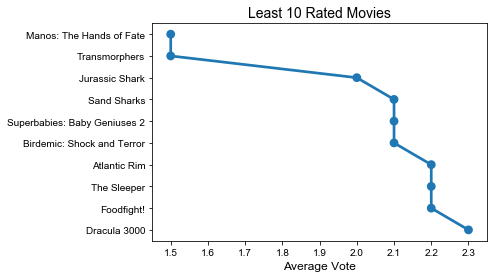

In [13]:
#Least 10 rated movies.
frame = pd.DataFrame(dataset['vote_average'].sort_values(ascending = True))
frame['original_title'] = dataset['original_title']
data = list(map(str,(frame['original_title'])))

##extract the least 10 rated moviese.
x = list(data[:10])
y = list(frame['vote_average'][:10])

#make the point plot and setup the title and labels.
a_axis = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
a_axis.set_title("Least 10 Rated Movies",fontsize = 14)
a_axis.set_xlabel("Average Vote", fontsize = 12)
#setup the stylesheet
sns.set_style("whitegrid")

#### Question 2: Which star was cast in movies the most?

In [14]:
#Create a function called countEvent() to count the actors/actresses in movies
def countEvent(x):
    event_plot = dataset[x].str.cat(sep = '|')
    event = pd.Series(event_plot.split('|'))
    data = event.value_counts(ascending=False)
    return data

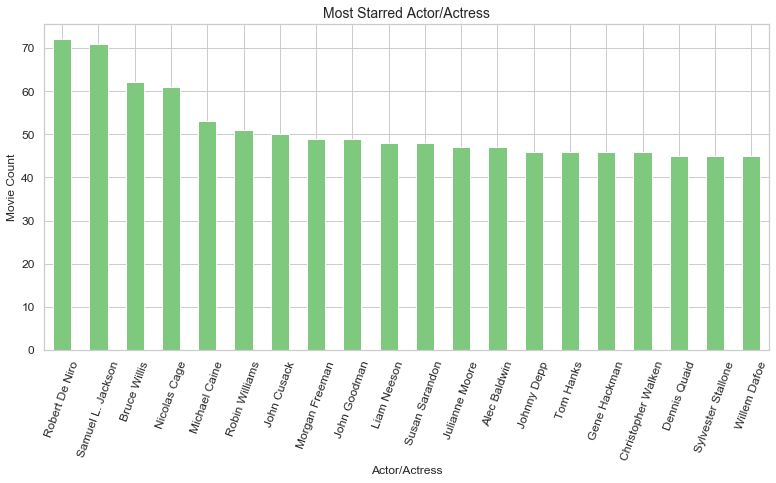

In [15]:
#Function call for countEvent()
film_counts = countEvent('cast')

#plot the bar.
film_counts.iloc[:20].plot.bar(figsize=(13,6), colormap= 'Accent', fontsize=12)

#setup the title and the labels of the plot.
plt.title("Most Starred Actor/Actress", fontsize=14)
plt.xticks(rotation = 70)
plt.xlabel('Actor/Actress', fontsize=12)
plt.ylabel("Movie Count",  fontsize= 12)
sns.set_style("whitegrid")

#### Question 3: Which movie has the highest profit and loss?

In [16]:
#Calculate the profit for each of the movie bby subtracting budget for revenue
dataset['profit'] = dataset['revenue'] - dataset['budget']

In [17]:
#Display the entry related to this index.
#call the fetchMinMax function.
fetchMinMax('profit')

Movie Which Has Highest profit :  Avatar
Movie Which Has Lowest profit  :  The Warrior's Way


,1386,2244
id,19995,46528
imdb_id,tt0499549,tt1032751
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
homepage,http://www.avatarmovie.com/,http://www.iamrogue.com/thewarriorsway
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.


#### Question 4: What month of each year released the highest number of movies?

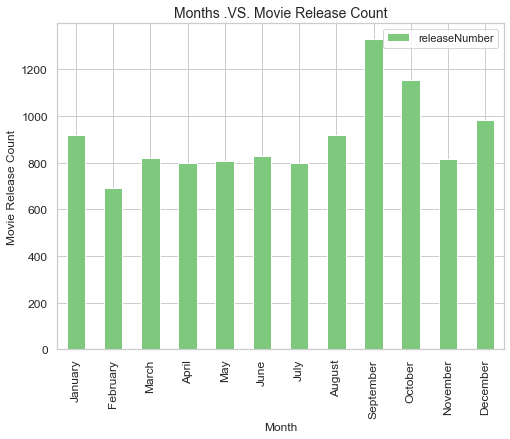

In [18]:
releaseMonth = dataset['release_date'].dt.month

#count the movies in each month using value_counts().
releaseNumber = releaseMonth.value_counts().sort_index()
months=['January','February','March','April','May','June','July','August','September','October','November','December']
releaseNumber = pd.DataFrame(releaseNumber)
releaseNumber['month'] = months

#change the column name of the new dataframe 'releaseNumber'
releaseNumber.rename(columns = {'release_date':'releaseNumber'},inplace=True)

#plot the bar graph using plot.
releaseNumber.plot(x='month',kind='bar',colormap='Accent',fontsize = 12,figsize=(8,6))

#set the labels and titles of the plot.
plt.title('Months .VS. Movie Release Count',fontsize = 14)
plt.xlabel('Month',fontsize = 12)
plt.ylabel('Movie Release Count',fontsize = 12)
sns.set_style("darkgrid")

#### Question 5: What is the average runtime of movies in each year?

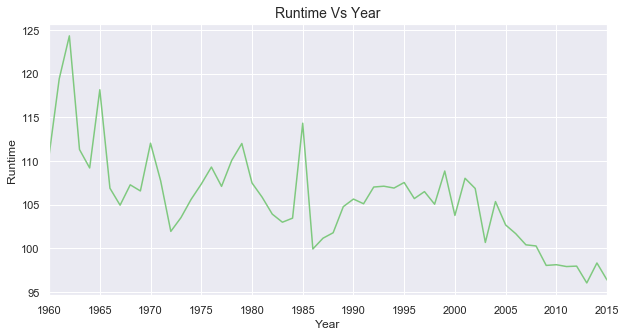

In [19]:
dataset.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,5), colormap='Accent')

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})

#setup the title of the figure
plt.title("Runtime Vs Year",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 12)
plt.ylabel('Runtime',fontsize = 12)
sns.set_style("darkgrid")

## Limitations

* Dataset has some missing values within its entries.
* There are no details on how vote_count and vote_average were being calculated.
* There were some entries in the budget column having less than a zero value